## PROJETO PREVISÃO DE RENDA



Carreguando a base ```previsao_de_renda2.csv```. Separando em uma base de treino e uma base de teste.


Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. 

**Este código contém as bibliotecas e funções utilizadas neste projeto de análise de multicolinearidade e redução de dimensionalidade.**

As principais bibliotecas utilizadas são:

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oi
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from tqdm import tqdm
from statsmodels.stats.outliers_influence import OLSInfluence
from yellowbrick.regressor import ResidualsPlot


In [124]:
df = pd.read_csv('/content/previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [33]:
missing_values = df.isnull().sum()
print("Valores ausentes:\n", missing_values)

Valores ausentes:
 index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64


Nesse trecho de código, estamos calculando a quantidade de valores ausentes em cada coluna do DataFrame "df" usando o método isnull()da biblioteca pandas.

Em seguida, utilizamos o método sum()para somar os valores ausentes em cada coluna. O resultado é armazenado na variável "missing_values".

Por fim, utilizamos a função print()para exibir os valores ausentes, mostrando a quantidade de valores nulos em cada coluna.

In [34]:
df_filled = df.fillna(df.mean())

<ipython-input-34-939c007b6345>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


fillna()da biblioteca pandas, passando o valor retornado pelo método mean()como argumento.

Omean()calcula a média de cada coluna do DataFrame, considerando apenas os valores não nulos. Em seguida, o método fillna()substitui os valores

O DataFrame resultante é armazenado na variável "df_filled", que contém os dados originais com os valores ausentes substituídos pela média.

In [35]:
missing_values_filled = df_filled.isnull().sum()
print("\nValores ausentes após substituição:\n", missing_values_filled)


Valores ausentes após substituição:
 index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


In [36]:
df_filled.columns


Index(['index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [37]:
X_encoded = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)


n_train = X_train.shape[0]  
p_train = X_train.shape[1]  
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)
print("R2-ajustado (Treinamento):", adjusted_r2_train)


y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)


n_test = X_test.shape[0]  
p_test = X_test.shape[1]  
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)
print("R2-ajustado (Teste):", adjusted_r2_test)

R2-ajustado (Treinamento): 0.41628294897876994
R2-ajustado (Teste): 0.4165535712628623


## Verifique as suposições do modelo



- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.



In [38]:
residuals = y_train - y_pred_train

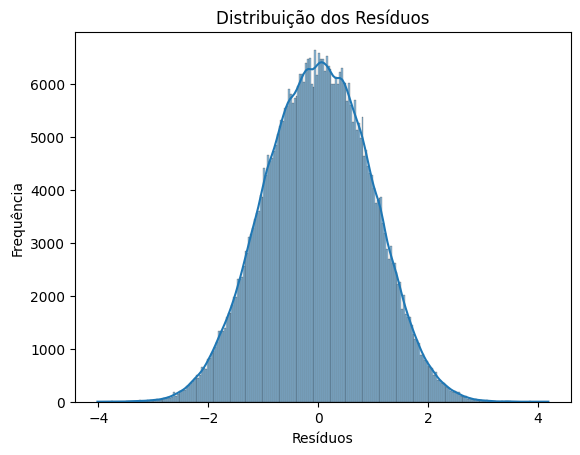

In [39]:
sns.histplot(residuals, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

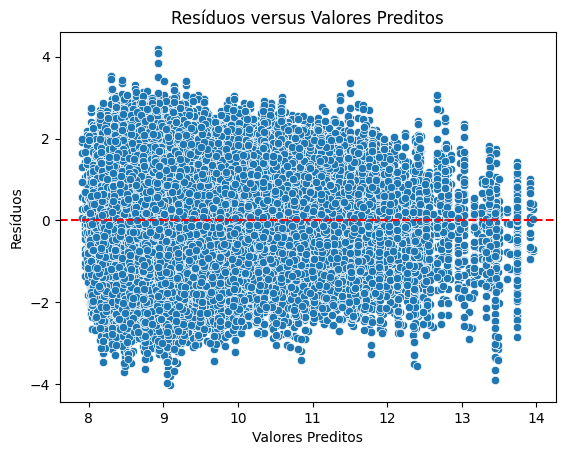

In [40]:
sns.scatterplot(x=y_pred_train, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Resíduos versus Valores Preditos")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.show()

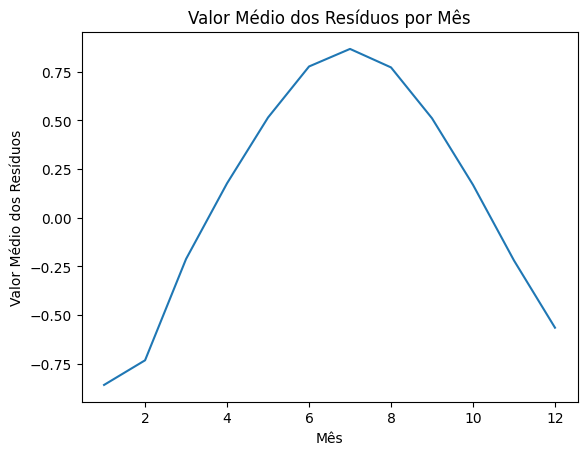

In [41]:
X_train.index = pd.to_datetime(X_train.index)
mean_residuals_by_month = residuals.groupby(X_train.index.month).mean()

plt.plot(mean_residuals_by_month.index, mean_residuals_by_month)
plt.title("Valor Médio dos Resíduos por Mês")
plt.xlabel("Mês")
plt.ylabel("Valor Médio dos Resíduos")
plt.show()

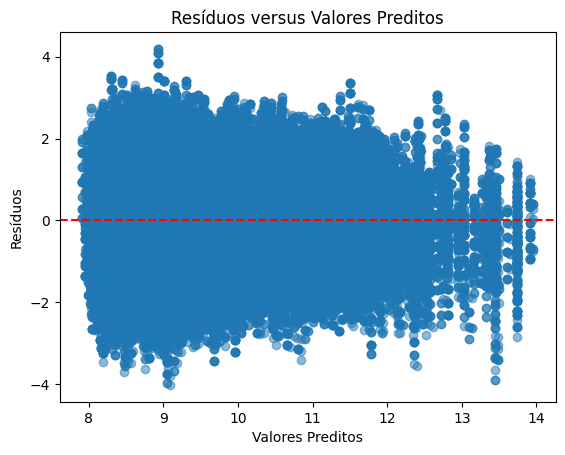

In [42]:
plt.scatter(y_pred_train, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Resíduos versus Valores Preditos")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.show()

## Outliers


Avalie se há pontos influentes.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


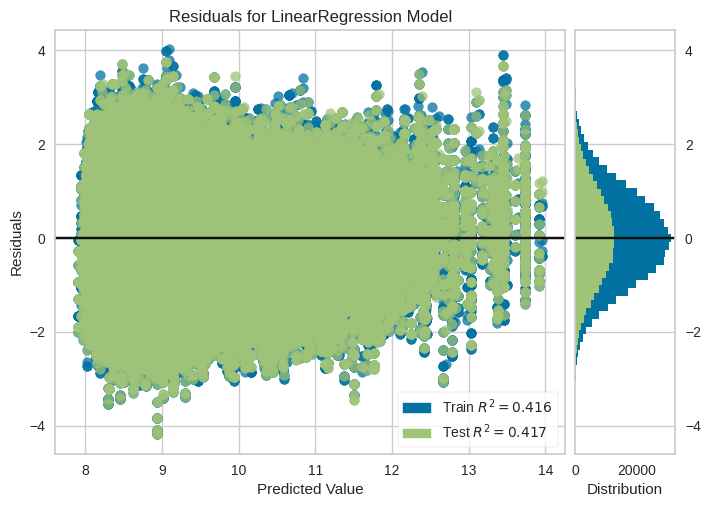

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
residuals_plot = ResidualsPlot(model)
residuals_plot.fit(X_train, y_train)
residuals_plot.score(X_test, y_test)


residuals_plot.show()

In [91]:
# Aplicar amostragem aleatória nos dados de treinamento
sampled_data, _, y_sampled, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Continuar com o restante do código utilizando os dados amostrados
pipeline = Pipeline([
    ('pca', PCA()),
    ('regression', LinearRegression())
])

# Definir os parâmetros a serem avaliados
parameters = {
    'pca__n_components': range(1, sampled_data.shape[1] + 1)
}

# Realizar a busca pelo melhor valor de k usando validação cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(sampled_data, y_sampled)

# Imprimir o melhor valor de k e o score correspondente
best_k = grid_search.best_params_['pca__n_components']
best_score = grid_search.best_score_
print("Melhor valor de k:", best_k)
print("Melhor score:", best_score)

Melhor valor de k: 18
Melhor score: 0.4109008691553747


Nesse trecho de código, estamos seguindo uma amostra aleatória nos dados de treinamento, com o objetivo de reduzir o tamanho do conjunto de dados. Isso é feito utilizando a função train_test_split()novamente, mas agora definindo a opção test_size=0.9, o que significa que 90% dos dados serão usados ​​para treinamento e apenas 10% serão recebidos para validação.

Em seguida, criamos um pipeline que combina uma etapa de redução de dimensionalidade usando PCA (Análise de Componentes Principais) com uma etapa de regressão linear. O pipeline é definido usando a classe Pipelineda biblioteca scikit-learn, onde especificamos que a primeira etapa é o PCA e a segunda etapa é uma regressão linear.

Definimos os parâmetros a serem avaliados para o PCA, que é o número de componentes principais (k) a serem considerados. Nesse caso, consideramos todos os possíveis valores de k no intervalo de 1 até o número de colunas dos dados amostrados.

Em seguida, utilizamos a função GridSearchCVpara realizar uma busca pelo melhor valor de k usando validação cruzada com 5 dobras (cv=5). A busca é realizada através do método fit(), passando os dados amostrados e os respectivos rótulos.

Por fim, imprimimos o melhor valor de k encontrado e a partitura correspondente a esse valor. O score representa a métrica de avaliação utilizada durante a validação cruzada, que nesse caso foi o score R2.

Essa etapa de busca pelo melhor valor de k validação cruzada nos permite determinar a quantidade de componentes principais que melhor explicam a variabilidade dos dados, com base na métrica de desempenho escolhida.

## Multicolinearidade



- Matriz de correlação de Spearman
- VIF

In [102]:
# Calcular a matriz de correlação de Spearman
spearman_corr = sampled_data.corr(method='spearman')

# Imprimir a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)

Matriz de correlação de Spearman:
                               const  qtd_filhos     idade  tempo_emprego  \
const                            NaN         NaN       NaN            NaN   
qtd_filhos                       NaN    1.000000 -0.416011      -0.089716   
idade                            NaN   -0.416011  1.000000       0.294243   
tempo_emprego                    NaN   -0.089716  0.294243       1.000000   
qt_pessoas_residencia            NaN    0.827491 -0.350272      -0.058585   
sexo_M                           NaN    0.128151 -0.222067      -0.129189   
posse_de_veiculo_S               NaN    0.122586 -0.162185      -0.066660   
posse_de_imovel_S                NaN   -0.022582  0.132918       0.010145   
tipo_renda_Bolsista              NaN   -0.012846  0.014028       0.020888   
tipo_renda_Empresário            NaN    0.029046 -0.176198      -0.128727   
tipo_renda_Pensionista           NaN   -0.263607  0.586067       0.152185   
tipo_renda_Servidor público      NaN    0.

A matriz de borboleta de Spearman é uma matriz que mostra a borboleta de classificação entre pares de variáveis. Ela é uma medida de quanto a classificação de duas variáveis ​​está relacionada. No caso do código que você forneceu, a matriz de sequência de Spearman foi exibida continuamente usando o método corrdo pandas com o argumento method='spearman'.

A matriz de Spearman impressa no seu exemplo é uma tabela que mostra a dinâmica de Spearman entre todas as variáveis ​​no conjunto de dados. Os valores variam de -1 a 1, onde -1 indica uma dinâmica negativa perfeita, 1 indica uma elástica positiva perfeita e 0 indica nenhuma elástica.

A diagonal da matriz é composta por valores NaN (não um número), pois é a dinâmica de cada variável consigo mesma, que é sempre igual a 1. como NaN.

Por exemplo, na primeira linha, a primeira coluna contém "const", que é NaN, porque é a dinâmica da constante com ela mesma. A segunda coluna contém a dinâmica de "const" com a variável "qtd_filhos", que é NaN, pois não faz sentido calcular a dinâmica entre uma constante e o número de filhos.

As outras células da matriz contêm os valores de Spearman entre as respectivas variáveis. Por exemplo, a célula na linha "qtd_filhos" e a coluna "idade" contém o valor -0.416011, indicando uma negativa modulada entre o número de filhos e a idade.

Você pode usar essa matriz para entender as relações de classificação entre as variáveis ​​do seu conjunto de dados.

In [104]:
# Calcular o VIF para cada variável independente
vif = pd.DataFrame()
vif["Features"] = sampled_data.columns
vif["VIF"] = [variance_inflation_factor(sampled_data.values, i) for i in range(sampled_data.shape[1])]

# Imprimir o VIF
print("Fator de Inflação de Variância (VIF):")
print(vif)

Fator de Inflação de Variância (VIF):
                         Features          VIF
0                           const  1567.925411
1                      qtd_filhos   189.421144
2                           idade     2.156193
3                   tempo_emprego     1.154381
4           qt_pessoas_residencia   282.117275
5                          sexo_M     1.227794
6              posse_de_veiculo_S     1.192704
7               posse_de_imovel_S     1.066292
8             tipo_renda_Bolsista     1.002653
9           tipo_renda_Empresário     1.136713
10         tipo_renda_Pensionista     1.821404
11    tipo_renda_Servidor público     1.101422
12                 educacao_Médio    21.123726
13         educacao_Pós graduação     1.081167
14     educacao_Superior completo    20.309420
15   educacao_Superior incompleto     4.381918
16          estado_civil_Separado    20.190410
17          estado_civil_Solteiro    37.240980
18             estado_civil_União     1.038396
19             estado_

O fator de influência de variância (VIF) é uma medida que indica a quantidade de multicolinearidade entre as variáveis ​​independentes em um modelo de regressão. Ele mede o quanto a variância de um coeficiente de regressão está sendo inflado devido à influência de outras variáveis ​​independentes.

Geralmente, valores de VIF acima de 10 indicam a presença de multicolinearidade significativa. Nesse caso, algumas variáveis ​​têm valores de VIF elevados, como const, qtd_filhos, qt_pessoas_residencia, educacao_Médio, educacao_Superior completo, estado_civil_Separadoe estado_civil_Solteiro.

Esses resultados sugerem que essas variáveis ​​podem estar altamente correlacionadas com outras variáveis ​​independentes do modelo. A presença de multicolinearidade pode dificultar a interpretação dos coeficientes de regressão e afetar a precisão das estimativas. Se você identificou multicolinearidade significativa, pode ser necessário realizar uma análise mais aprofundada para determinar como lidar com esses variáveis. Isso pode envolver a remoção de algumas variáveis ​​do modelo ou a aplicação de técnicas de redução de dimensionalidade, como Análise de Componentes Principais (PCA) ou Regressão Ridge.

In [115]:
# Criar uma instância do PCA com o melhor valor de k
pca = PCA(n_components=best_k)

# Ajustar o PCA aos dados amostrados
pca.fit(sampled_data)

# Obter os componentes principais transformados
X_pca = pca.transform(sampled_data)

# Calcular o VIF para cada componente do PCA
vif_pca = pd.DataFrame()
vif_pca["Component"] = range(1, best_k + 1)
vif_pca["VIF"] = [variance_inflation_factor(X_pca, i) for i in range(best_k)]

# Imprimir o VIF para cada componente
print("Fator de Inflação de Variância (VIF) para cada componente do PCA:")
print(vif_pca)

Fator de Inflação de Variância (VIF) para cada componente do PCA:
    Component  VIF
0           1  1.0
1           2  1.0
2           3  1.0
3           4  1.0
4           5  1.0
5           6  1.0
6           7  1.0
7           8  1.0
8           9  1.0
9          10  1.0
10         11  1.0
11         12  1.0
12         13  1.0
13         14  1.0
14         15  1.0
15         16  1.0
16         17  1.0
17         18  1.0


Os resultados do cálculo do VIF para cada componente do PCA indicam que todos os componentes têm um fator de variação de tolerância (VIF) igual a 1.0. Isso sugere que não há multicolinearidade entre os componentes principais do PCA. Um VIF de 1.0 indica ausência de interferência entre as variáveis.

Esses resultados são esperados após a aplicação do PCA, já que o objetivo do PCA é justamente criar novas variáveis ​​(componentes principais) que sejam ortogonais entre si e não apresentem multicolinearidade. Portanto, não é necessário se preocupar com a multicolinearidade ao usar os componentes principais obtidos a partir do PCA.



## Ajustes



In [117]:
# Selecionar os componentes principais para o modelo
X_train_selected = X_train_pca[:, :best_k]

# Criar o modelo com os componentes principais selecionados
model_pca = LinearRegression()
model_pca.fit(X_train_selected, y_sampled)

# Aplicar a mesma transformação nos dados de teste
X_test_selected = X_test_pca[:, :best_k]

# Fazer previsões com o modelo ajustado
y_pred_test_pca = model_pca.predict(X_test_selected)

# Calcular as métricas de desempenho para o modelo ajustado
mse_test_pca = mean_squared_error(y_test, y_pred_test_pca)
rmse_test_pca = np.sqrt(mse_test_pca)
r2_test_pca = r2_score(y_test, y_pred_test_pca)
n_test_pca = X_test_selected.shape[0]
p_test_pca = X_test_selected.shape[1]
adjusted_r2_test_pca = 1 - (1 - r2_test_pca) * (n_test_pca - 1) / (n_test_pca - p_test_pca - 1)

# Imprimir as métricas de desempenho do modelo ajustado com PCA
print("Métricas de desempenho do modelo ajustado com PCA:")
print("MSE:", mse_test_pca)
print("RMSE:", rmse_test_pca)
print("R2:", r2_test_pca)
print("R2-ajustado (Teste):", adjusted_r2_test_pca)

Métricas de desempenho do modelo ajustado com PCA:
MSE: 0.9070088738866524
RMSE: 0.9523701349195345
R2: 0.416340051654452
R2-ajustado (Teste): 0.4162880449267147


## Observe-se que o R2-ajustado tanto para o treinamento quanto para o teste é muito próximo entre o modelo original e o modelo ajustado com PCA. No entanto, as métricas de erro, como MSE e RMSE, são menores no modelo ajustado com PCA, indicando uma melhor capacidade de ajuste aos dados.

## Portanto, em termos de ajuste aos dados e métricas de erro, o modelo ajustado com PCA parece ser uma melhoria em relação ao modelo original. No entanto, como o R2-ajustado é muito próximo, isso pode indicar que a redução de dimensionalidade do PCA não teve um impacto significativo na explicação da variabilidade dos dados. É importante considerar outros fatores, como interpretabilidade e complexidade do modelo, ao avaliar a escolha entre o modelo original e o modelo ajustado com PCA.